#  Construction in Ireland: Cement Data 

CA2 (26/05/2023) - MSc in Data Analytics 
<b>Student ID: 2023063

## Introduction 
write briefing

- Cement data source: https://app.indexbox.io/table/252321h1/372/
- Reddit data source: https://www.reddit.com/r/ireland/comments/xq6miu/10_added_to_concrete_in_the_midst_of_this_crisis/

In [117]:
# Hide/Unhide code

from IPython.display import HTML

"""

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

"""

'\n\nHTML(\'\'\'<script>\ncode_show=true; \nfunction code_toggle() {\n if (code_show){\n $(\'div.input\').hide();\n } else {\n $(\'div.input\').show();\n }\n code_show = !code_show\n} \n$( document ).ready(code_toggle);\n</script>\n<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>\'\'\')\n\n'

## Data Preparation and Visualisation

In [118]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') # To suppress the warnings
%matplotlib inline 

<b>Cement data .tail()

In [119]:
# Read cement data (csv)
cement_data = pd.read_csv("cementdata.csv")

In [120]:
cement_data.head()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
0,Consumption Volume,Thousand tons,3563.00,3489.00,1748.00,1704.00,1263.00,48.40,856.00,580.90,667.00,Ireland,Cement
1,Consumption Value,Million USD,264.30,267.40,159.10,160.80,137.10,7.70,101.40,69.20,83.40,Ireland,Cement
2,Production Volume,Thousand tons,4003.00,3900.00,2600.00,2600.00,2103.00,1198.00,2000.00,2000.00,2500.00,Ireland,Cement
3,Production Value,Million USD,146.70,160.20,175.10,191.30,209.00,228.40,234.90,237.60,323.70,Ireland,Cement
4,Import Volume,Thousand tons,684.40,735.40,204.10,138.70,104.30,90.70,92.30,106.70,89.80,Ireland,Cement


<b>Cement data .tail()

In [121]:
cement_data.tail()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
125,Import Price,USD per Ton,81.5,97.6,225.8,343,773.8,189.3,330.6,225.8,275.3,Iran,Cement
126,Export Price,USD per Ton,91.9,97.2,76.4,76.5,62.5,62.5,59.6,74.5,59.7,Iran,Cement
127,Per Capita Consumption,Kg per Person,569,608.9,670,653.2,861.6,902.8,862.3,800.3,626.9,Iran,Cement
128,Net Export Volume,Thousand tons,11.1,43.8,631.5,1291,956.9,1227,1927,3951,8851,Iran,Cement
129,Net Export Value,Million USD,1.7,4.2,46.9,96.7,53.4,72.7,103.7,286.9,522,Iran,Cement


<b>Number of countries 

In [122]:
cement_data["Country"].nunique()

10

<b>Country names

In [123]:
cement_data["Country"].unique()

array(['Ireland', 'USA', 'Brazil', 'China', 'Germany', 'Russia',
       'Australia', 'Vietnam', 'Japan', 'Iran'], dtype=object)

In [124]:
# Define function to split data by country

def cement_df(country, new_df, original_df):
    new_df = original_df[original_df["Country"]==country]
    new_df = new_df.drop({"Country","Product","UNITS"}, axis='columns')
    new_df = new_df.transpose()
    new_df.columns = new_df.iloc[0]
    new_df.drop(index=new_df.index[0], axis=0, inplace=True)
    new_df.reset_index(inplace=True)
    new_df.rename(columns= {"index":"Year"},inplace=True)
    return new_df

<b>Cleaned Ireland cement data

In [125]:
# Ireland cement data
ireland_cement = cement_df(country="Ireland", new_df="ireland_cement", original_df=cement_data)
ireland_cement["Code"] = "IRL"
ireland_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.00,264.30,4003.00,146.70,684.40,65.50,1124.00,105.50,95.70,93.90,810.10,439.60,40.00,IRL
1,2008,3489.00,267.40,3900.00,160.20,735.40,65.40,1146.00,112.00,88.90,97.70,777.20,410.80,46.60,IRL
2,2009,1748.00,159.10,2600.00,175.10,204.10,23.00,1056.00,101.90,112.60,96.50,382.60,852.00,78.90,IRL
3,2010,1704.00,160.80,2600.00,191.30,138.70,13.90,1035.00,104.70,99.90,101.20,368.20,896.50,90.90,IRL
4,2011,1263.00,137.10,2103.00,209.00,104.30,10.90,944.60,94.00,104.60,99.50,270.80,840.30,83.10,IRL
5,2012,48.40,7.70,1198.00,228.40,90.70,10.70,1240.00,111.20,118.50,89.60,10.40,1150.00,100.40,IRL
6,2013,856.00,101.40,2000.00,234.90,92.30,10.00,1236.00,110.60,107.80,89.50,182.80,1144.00,100.60,IRL
7,2014,580.90,69.20,2000.00,237.60,106.70,9.50,1526.00,148.00,88.90,97.00,124.00,1419.00,138.50,IRL
8,2015,667.00,83.40,2500.00,323.70,89.80,7.00,1923.00,145.40,78.10,75.60,141.90,1833.00,138.40,IRL


In [126]:
ireland_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
count,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
unique,9,9,9,7,9,9,9,9,9,8,9,9,9,9,1
top,2007,3563.00,264.30,2600.00,146.70,684.40,65.50,1124.00,105.50,88.90,93.90,810.10,439.60,40.00,IRL
freq,1,1,1,2,1,1,1,1,1,2,1,1,1,1,9


In [127]:
# United States cement data

usa_cement = cement_df(country="USA", new_df="usa_cement", original_df=cement_data)
usa_cement["Code"] = "USA"
#usa_cement

In [128]:
# Brazil cement data

brazil_cement = cement_df(country="Brazil", new_df="brazil_cement", original_df=cement_data)
brazil_cement["Code"] = "BRA"
#brazil_cement

In [129]:
# China cement data

china_cement = cement_df(country="China", new_df="china_cement", original_df=cement_data)
china_cement["Code"] = "CHN"
#china_cement

In [130]:
# Germany cement data

germany_cement = cement_df(country="Germany", new_df="germany_cement", original_df=cement_data)
germany_cement["Code"] = "DEU"
#germany_cement

In [131]:
# Russia cement data

russia_cement = cement_df(country="Russia", new_df="russia_cement", original_df=cement_data)
russia_cement["Code"] = "RUS"
#russia_cement

In [132]:
# Australia cement data

australia_cement = cement_df(country="Australia", new_df="australia_cement", original_df=cement_data)
australia_cement["Code"] = "AUS"
#australia_cement

In [133]:
# Vietnam cement data

vietnam_cement = cement_df(country="Vietnam", new_df="vietnam_cement", original_df=cement_data)
vietnam_cement["Code"] = "VNM"
#vietnam_cement

In [134]:
# Japan cement data

japan_cement = cement_df(country="Japan", new_df="japan_cement", original_df=cement_data)
japan_cement["Code"] = "JPN"
#japan_cement

In [135]:
# Iran cement data

iran_cement = cement_df(country="Iran", new_df="iran_cement", original_df=cement_data)
iran_cement["Code"] = "IRN"
#iran_cement

In [136]:
# Convert object to number

def convert_2num(df):
    df["Year"] = pd.to_numeric(df["Year"])
    df["Consumption Volume"] = pd.to_numeric(df["Consumption Volume"])
    df["Consumption Value"] = pd.to_numeric(df["Consumption Value"])
    df["Production Volume"] = pd.to_numeric(df["Production Volume"])
    df["Production Value"] = pd.to_numeric(df["Production Value"])
    df["Import Volume"] = pd.to_numeric(df["Import Volume"])
    df["Import Value"] = pd.to_numeric(df["Import Value"])
    df["Export Volume"] = pd.to_numeric(df["Export Volume"])
    df["Export Value"] = pd.to_numeric(df["Export Value"])
    df["Import Price"] = pd.to_numeric(df["Import Price"])
    df["Export Price"] = pd.to_numeric(df["Export Price"])
    df["Per Capita Consumption"] = pd.to_numeric(df["Per Capita Consumption"])

convert_2num(ireland_cement)
convert_2num(usa_cement)
convert_2num(brazil_cement)
convert_2num(china_cement)
convert_2num(germany_cement)
convert_2num(russia_cement)
convert_2num(australia_cement)
convert_2num(vietnam_cement)
convert_2num(japan_cement)
convert_2num(iran_cement)

In [137]:
ireland_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,1546.588889,138.933333,2544.888889,211.877778,249.600000,23.988889,1247.844444,114.811111,99.444444,93.388889,340.888889
std,2.738613,1245.610124,86.375865,906.482687,53.235227,263.742957,23.934726,302.733658,18.922833,12.868383,7.793017,282.572333
min,2007.000000,48.400000,7.700000,1198.000000,146.700000,89.800000,7.000000,944.600000,94.000000,78.100000,75.600000,10.400000
25%,2009.000000,667.000000,83.400000,2000.000000,175.100000,92.300000,10.000000,1056.000000,104.700000,88.900000,89.600000,141.900000
50%,2011.000000,1263.000000,137.100000,2500.000000,209.000000,106.700000,10.900000,1146.000000,110.600000,99.900000,96.500000,270.800000
75%,2013.000000,1748.000000,160.800000,2600.000000,234.900000,204.100000,23.000000,1240.000000,112.000000,107.800000,97.700000,382.600000
max,2015.000000,3563.000000,267.400000,4003.000000,323.700000,735.400000,65.500000,1923.000000,148.000000,118.500000,101.200000,810.100000


<b>New dataframe with merged and cleaned cement data (cement_data)

In [138]:
# Merge data

cement_merge = pd.merge(ireland_cement,usa_cement, how="outer")
cement_merge = pd.merge(cement_merge,brazil_cement, how="outer")
cement_merge = pd.merge(cement_merge,china_cement, how="outer")
cement_merge = pd.merge(cement_merge,germany_cement, how="outer")
cement_merge = pd.merge(cement_merge,russia_cement, how="outer")
cement_merge = pd.merge(cement_merge,australia_cement, how="outer")
cement_merge = pd.merge(cement_merge,vietnam_cement, how="outer")
cement_merge = pd.merge(cement_merge,japan_cement, how="outer")
cement_merge = pd.merge(cement_merge,iran_cement, how="outer")

cement_merge

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.0,264.3,4003.0,146.7,684.4,65.5,1124.0,105.5,95.7,93.9,810.1,439.60,40.00,IRL
1,2008,3489.0,267.4,3900.0,160.2,735.4,65.4,1146.0,112.0,88.9,97.7,777.2,410.80,46.60,IRL
2,2009,1748.0,159.1,2600.0,175.1,204.1,23.0,1056.0,101.9,112.6,96.5,382.6,852.00,78.90,IRL
3,2010,1704.0,160.8,2600.0,191.3,138.7,13.9,1035.0,104.7,99.9,101.2,368.2,896.50,90.90,IRL
4,2011,1263.0,137.1,2103.0,209.0,104.3,10.9,944.6,94.0,104.6,99.5,270.8,840.30,83.10,IRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2011,65043.0,4129.0,66000.0,3394.0,9.0,7.0,965.9,60.4,773.8,62.5,861.6,956.9,53.4,IRN
86,2012,69023.0,4610.0,70250.0,3903.0,31.7,6.0,1258.0,78.7,189.3,62.5,902.8,1227,72.7,IRN
87,2013,66773.0,4984.0,68700.0,4489.0,41.1,13.6,1968.0,117.2,330.6,59.6,862.3,1927,103.7,IRN
88,2014,62749.0,5290.0,66700.0,5162.0,47.9,10.8,3999.0,297.8,225.8,74.5,800.3,3951,286.9,IRN


In [139]:
# Check data type

cement_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    90 non-null     int64  
 1   Consumption Volume      90 non-null     float64
 2   Consumption Value       90 non-null     float64
 3   Production Volume       90 non-null     float64
 4   Production Value        90 non-null     float64
 5   Import Volume           90 non-null     float64
 6   Import Value            90 non-null     float64
 7   Export Volume           90 non-null     float64
 8   Export Value            90 non-null     float64
 9   Import Price            90 non-null     float64
 10  Export Price            90 non-null     float64
 11  Per Capita Consumption  90 non-null     float64
 12  Net Export Volume       90 non-null     object 
 13  Net Export Value        90 non-null     object 
 14  Code                    90 non-null     obje

### Interactive and Static charts

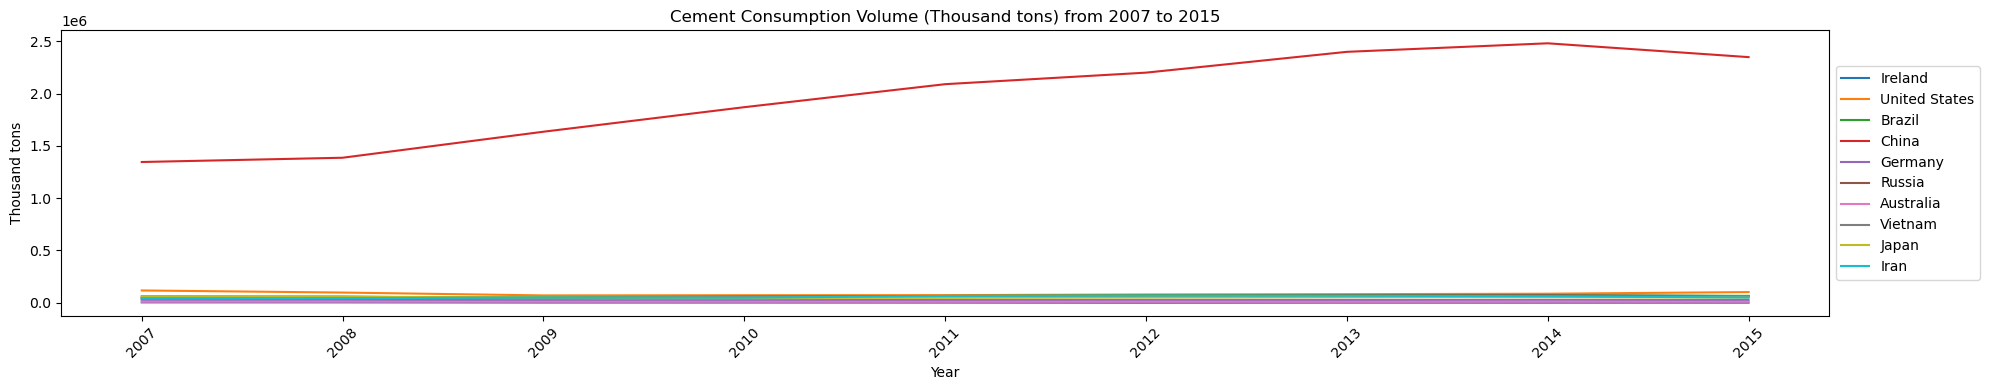

In [141]:
# Plot Cement Consumption Volume (Thousand tons) 
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

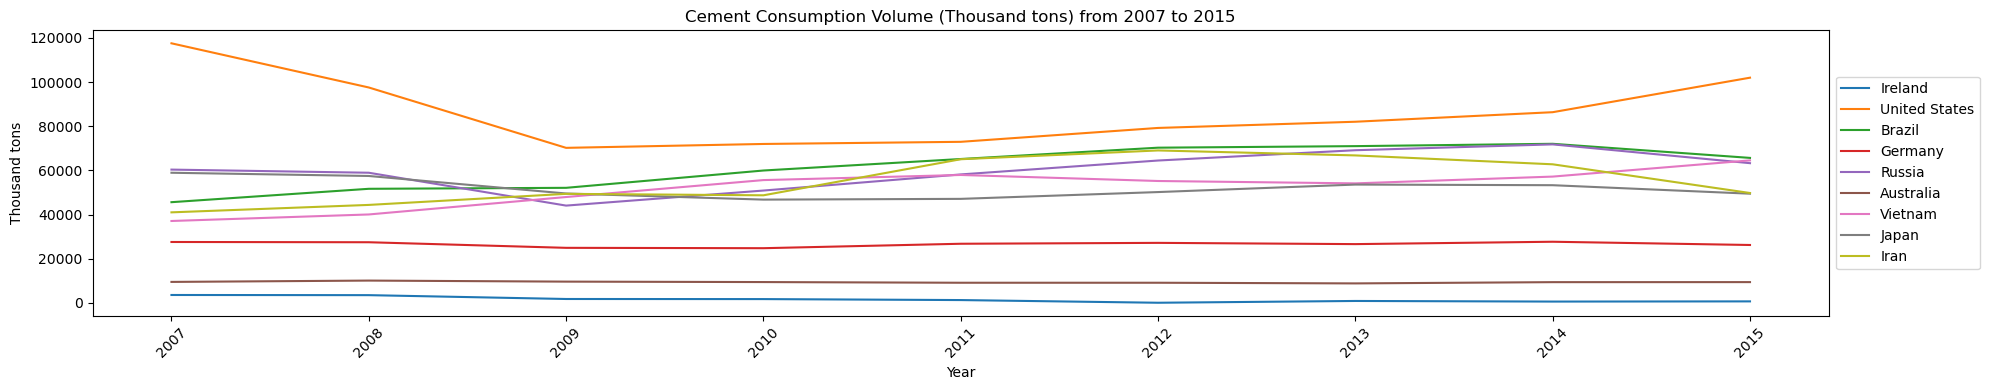

In [142]:
# Plot Cement Consumption Volume (Thousand tons) excluding China
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
#ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

In [143]:
# Interactive map graph: Cement Production Value (Million USD)

fig = px.choropleth(cement_merge, locations="Code",
                    color="Production Value", 
                    hover_name="Code", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [0.10, 'rgb(252, 244, 83)'],
                      [0.2, 'rgb(255, 145, 36)'],
                      [0.50, 'rgb(255, 85, 28)'],
                      [1, 'rgb(227,26,28,0.5)']])
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Production Value (Million USD)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) 
    # by default, projection type is set to 'equirectangular'
)
fig.show()


In [144]:
# Interactive scatterplot map graph: Cement Per Capita Consumption (kg/person)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Per Capita Consumption", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Per Capita Consumption (kg/person)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()


In [145]:
# Interactive scatterplot map graph: Cement Import Price (USD per ton)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Import Price", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Import Price (USD per ton)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()


In [146]:
# Interactive scatterplot map graph: Cement Export Price (USD per ton)

fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Export Price", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Export Price (USD per ton)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()

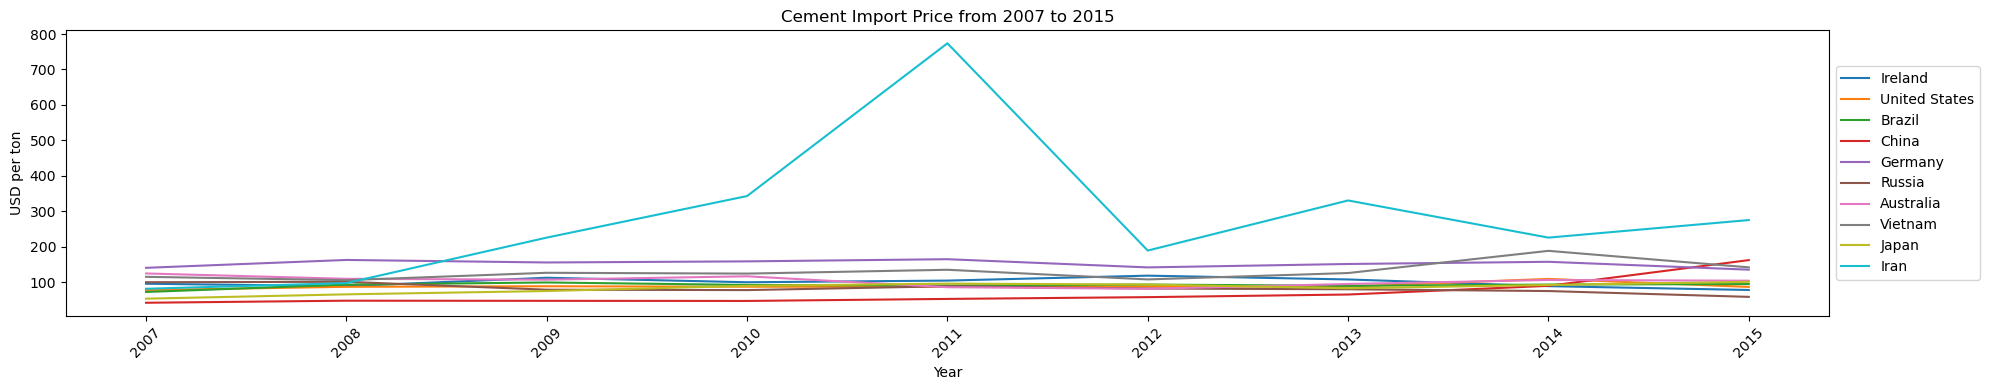

In [147]:
# Plot Cement Import Price from 2007 to 2015
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Import Price"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Import Price"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Import Price"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Import Price"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Import Price"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Import Price"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Import Price"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Import Price"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Import Price"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Import Price"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Import Price from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("USD per ton")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

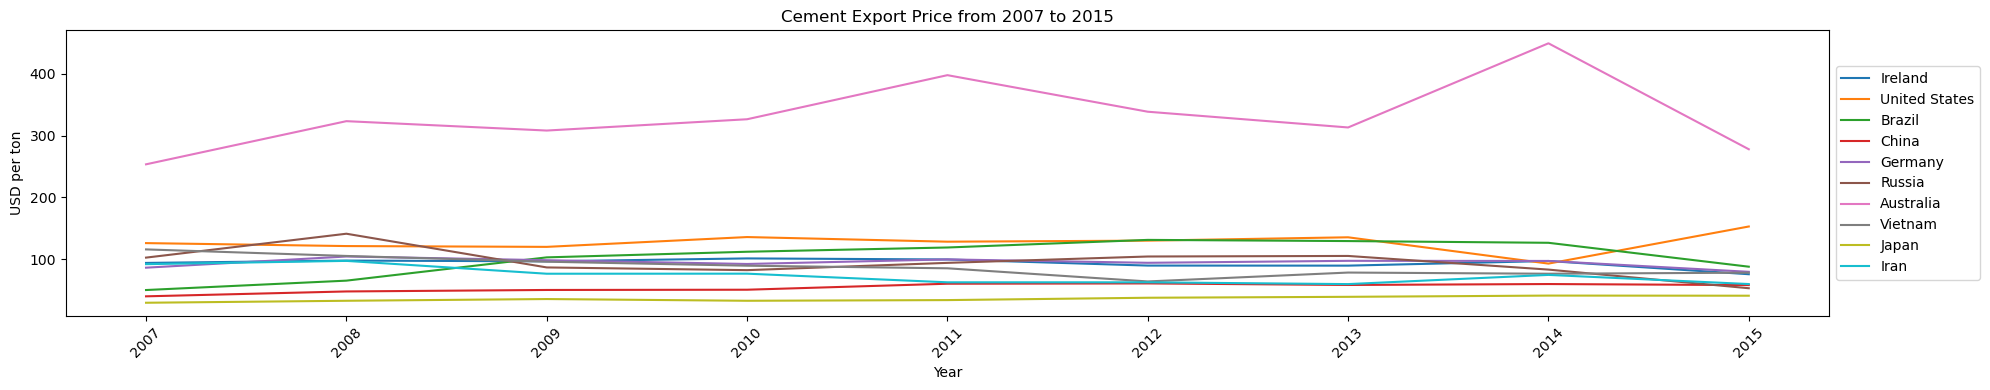

In [148]:
# Plot Cement Export Price (USD per ton) from 2007 to 2015
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Export Price"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Export Price"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Export Price"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Export Price"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Export Price"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Export Price"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Export Price"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Export Price"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Export Price"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Export Price"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Export Price from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("USD per ton")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

## Statistical Analysis

In [149]:
ireland_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,1546.588889,138.933333,2544.888889,211.877778,249.600000,23.988889,1247.844444,114.811111,99.444444,93.388889,340.888889
std,2.738613,1245.610124,86.375865,906.482687,53.235227,263.742957,23.934726,302.733658,18.922833,12.868383,7.793017,282.572333
min,2007.000000,48.400000,7.700000,1198.000000,146.700000,89.800000,7.000000,944.600000,94.000000,78.100000,75.600000,10.400000
25%,2009.000000,667.000000,83.400000,2000.000000,175.100000,92.300000,10.000000,1056.000000,104.700000,88.900000,89.600000,141.900000
50%,2011.000000,1263.000000,137.100000,2500.000000,209.000000,106.700000,10.900000,1146.000000,110.600000,99.900000,96.500000,270.800000
75%,2013.000000,1748.000000,160.800000,2600.000000,234.900000,204.100000,23.000000,1240.000000,112.000000,107.800000,97.700000,382.600000
max,2015.000000,3563.000000,267.400000,4003.000000,323.700000,735.400000,65.500000,1923.000000,148.000000,118.500000,101.200000,810.100000


In [151]:
usa_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,86637.444444,7527.000000,79311.000000,6877.888889,8916.555556,771.344444,1589.977778,198.122222,88.911111,126.922222,279.200000
std,2.738613,16044.408349,2203.130103,11604.855008,1764.841738,5177.386578,380.648437,607.854443,62.462644,8.306540,16.140537,54.282225
min,2007.000000,70200.000000,5503.000000,64843.000000,5064.000000,5937.000000,519.000000,969.600000,117.500000,77.900000,92.800000,229.400000
25%,2009.000000,72929.000000,6020.000000,68639.000000,5568.000000,6141.000000,552.700000,1042.000000,131.400000,87.100000,121.200000,234.500000
50%,2011.000000,82025.000000,6901.000000,77415.000000,6506.000000,6338.000000,571.900000,1571.000000,211.300000,87.400000,128.300000,260.000000
75%,2013.000000,97539.000000,8547.000000,87610.000000,7800.000000,10337.000000,896.100000,1904.000000,257.700000,88.100000,135.400000,318.700000
max,2015.000000,117546.000000,12055.000000,96850.000000,10153.000000,21739.000000,1693.000000,2847.000000,264.200000,109.300000,152.900000,391.000000


In [152]:
brazil_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,61484.111111,6386.333333,61035.000000,6375.444444,698.388889,64.066667,249.122222,15.966667,91.044444,102.644444,308.744444
std,2.738613,9677.057177,1429.219892,9098.922409,1587.212345,327.972222,30.373755,416.752942,20.745602,7.463764,29.241969,42.159344
min,2007.000000,45592.000000,3981.000000,46551.000000,3802.000000,286.600000,20.800000,32.700000,4.200000,72.500000,50.000000,238.700000
25%,2009.000000,52095.000000,5397.000000,51970.000000,5086.000000,397.000000,39.400000,40.500000,4.500000,90.600000,87.800000,267.700000
50%,2011.000000,65145.000000,6616.000000,64093.000000,6714.000000,823.900000,77.000000,45.400000,5.400000,93.300000,112.000000,318.700000
75%,2013.000000,70275.000000,7647.000000,69323.000000,7690.000000,985.600000,92.100000,147.900000,13.000000,93.400000,126.500000,350.400000
max,2015.000000,72034.000000,7906.000000,71254.000000,8250.000000,1098.000000,99.500000,1246.000000,62.300000,99.300000,131.200000,352.700000


In [153]:
china_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,1.973995e+06,110051.222222,1.984019e+06,109410.333333,542.433333,29.977778,10566.333333,558.411111,68.100000,53.877778,1408.111111
std,2.738613,4.343614e+05,32978.175127,4.331149e+05,35286.962646,254.244184,9.396512,2248.421502,69.681928,38.132434,7.229415,291.471458
min,2007.000000,1.346507e+06,58994.000000,1.361170e+06,54201.000000,103.600000,16.800000,8487.000000,425.600000,42.100000,39.800000,985.000000
25%,2009.000000,1.636216e+06,84842.000000,1.644000e+06,82445.000000,411.200000,22.400000,9202.000000,529.600000,47.500000,50.100000,1183.000000
50%,2011.000000,2.091058e+06,124781.000000,2.099000e+06,126356.000000,565.300000,27.100000,9827.000000,561.300000,52.900000,58.000000,1495.000000
75%,2013.000000,2.349902e+06,136241.000000,2.359000e+06,136866.000000,702.700000,37.700000,10942.000000,606.900000,65.300000,59.700000,1645.000000
max,2015.000000,2.482064e+06,147064.000000,2.492000e+06,148660.000000,855.600000,45.300000,15195.000000,636.700000,162.300000,60.700000,1746.000000


In [154]:
germany_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,26568.111111,2219.666667,31897.333333,2662.777778,1183.333333,179.422222,6513.000000,614.866667,152.111111,94.288889,327.177778
std,2.738613,1092.306441,144.774825,1282.968628,184.979578,129.574303,17.406448,502.419645,77.422494,10.512783,7.500241,13.032822
min,2007.000000,24756.000000,1980.000000,29894.000000,2322.000000,1025.000000,159.600000,5747.000000,498.000000,135.400000,79.500000,306.000000
25%,2009.000000,26207.000000,2188.000000,31160.000000,2644.000000,1064.000000,166.200000,6184.000000,570.000000,141.800000,92.200000,320.700000
50%,2011.000000,26766.000000,2198.000000,32099.000000,2665.000000,1144.000000,177.200000,6541.000000,599.700000,155.700000,97.100000,330.700000
75%,2013.000000,27452.000000,2295.000000,32779.000000,2709.000000,1308.000000,184.300000,6961.000000,643.700000,158.800000,98.300000,338.400000
max,2015.000000,27677.000000,2420.000000,33581.000000,2975.000000,1344.000000,208.800000,7193.000000,750.100000,164.900000,104.300000,339.600000


In [155]:
russia_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,60108.000000,5371.333333,58197.777778,5492.111111,3175.111111,266.066667,1264.788889,114.711111,82.522222,94.666667,419.144444
std,2.738613,8624.178207,1209.553947,7911.736705,1476.084808,1643.083796,159.460042,583.017929,53.837869,13.015354,23.795063,59.513740
min,2007.000000,44046.000000,3703.000000,44266.000000,3286.000000,1124.000000,88.600000,386.900000,36.400000,58.700000,52.900000,307.800000
25%,2009.000000,58164.000000,4133.000000,53548.000000,4142.000000,2066.000000,169.200000,700.200000,68.100000,77.800000,83.100000,406.000000
50%,2011.000000,60349.000000,5694.000000,59939.000000,5748.000000,2883.000000,212.500000,1464.000000,116.300000,80.100000,94.000000,421.600000
75%,2013.000000,64461.000000,6155.000000,62103.000000,6434.000000,4338.000000,347.300000,1723.000000,155.300000,88.600000,104.300000,449.500000
max,2015.000000,71772.000000,7027.000000,69139.000000,7563.000000,5862.000000,593.100000,1868.000000,185.000000,101.200000,141.200000,499.200000


In [156]:
australia_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,9377.444444,3003.000000,8933.333333,2962.222222,461.766667,46.966667,24.922222,5.866667,103.433333,332.188889,419.133333
std,2.738613,360.470218,324.767224,350.000000,513.695138,137.113393,13.031980,18.182669,2.464752,13.930901,59.484272,30.903317
min,2007.000000,8810.000000,2604.000000,8400.000000,2333.000000,303.100000,31.600000,8.500000,2.400000,81.400000,253.600000,380.600000
25%,2009.000000,9109.000000,2726.000000,8600.000000,2631.000000,383.200000,40.300000,16.600000,4.300000,95.000000,308.300000,399.100000
50%,2011.000000,9395.000000,2954.000000,9000.000000,2879.000000,431.500000,45.600000,20.600000,5.600000,106.300000,323.500000,405.100000
75%,2013.000000,9485.000000,3181.000000,9200.000000,3041.000000,530.500000,51.200000,24.600000,7.000000,109.600000,338.800000,442.300000
max,2015.000000,10086.000000,3648.000000,9400.000000,4047.000000,705.800000,77.300000,71.000000,9.800000,124.700000,449.600000,472.600000


In [158]:
vietnam_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,52172.555556,4352.333333,53484.555556,4565.666667,69.211111,8.644444,1381.333333,106.877778,130.133333,87.577778,580.622222
std,2.738613,8863.098627,452.635339,9902.814614,496.552364,34.798256,3.870759,1572.262425,120.747151,24.858751,15.995138,85.446252
min,2007.000000,37076.000000,3663.000000,37102.000000,3603.000000,31.400000,4.000000,89.400000,9.000000,105.800000,63.900000,431.700000
25%,2009.000000,47930.000000,3976.000000,47900.000000,4297.000000,36.500000,5.600000,94.000000,10.400000,115.200000,78.100000,547.400000
50%,2011.000000,55187.000000,4356.000000,56353.000000,4596.000000,63.500000,7.300000,430.400000,36.700000,125.900000,85.200000,610.100000
75%,2013.000000,57183.000000,4804.000000,58271.000000,4967.000000,92.600000,11.500000,2942.000000,229.900000,135.100000,95.900000,628.400000
max,2015.000000,64521.000000,5004.000000,67427.000000,5269.000000,123.500000,15.600000,3834.000000,292.800000,188.500000,115.800000,689.500000


In [160]:
japan_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,51803.555556,209.511111,56619.000000,220.155556,772.444444,61.766667,5587.888889,199.322222,83.355556,35.777778,403.466667
std,2.738613,4315.529895,31.533294,4421.625041,47.935767,216.884889,10.965856,457.626060,22.946229,15.645136,4.049314,33.563634
min,2007.000000,46756.000000,160.500000,51291.000000,138.600000,393.700000,39.800000,4924.000000,165.700000,53.600000,29.400000,363.700000
25%,2009.000000,49441.000000,184.900000,54737.000000,190.900000,628.900000,56.500000,5238.000000,175.800000,75.200000,32.600000,385.200000
50%,2011.000000,50175.000000,214.100000,54827.000000,233.500000,827.200000,61.800000,5409.000000,203.700000,89.800000,35.400000,390.700000
75%,2013.000000,53572.000000,229.600000,57962.000000,244.400000,846.400000,68.800000,5940.000000,214.800000,93.400000,39.000000,417.500000
max,2015.000000,58919.000000,250.700000,63705.000000,280.400000,1154.000000,79.100000,6285.000000,235.800000,101.100000,41.000000,458.500000


In [161]:
iran_cement.describe()

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,55195.555556,3953.555556,57294.444444,3572.111111,31.055556,6.622222,2129.900000,138.655556,282.522222,73.422222,728.333333
std,2.738613,10631.753326,1135.857728,11191.973811,1428.550178,19.494109,3.838873,2796.589776,170.719800,205.276160,13.893594,127.628778
min,2007.000000,40989.000000,2185.000000,41000.000000,1588.000000,7.800000,2.000000,75.300000,6.900000,81.500000,59.600000,569.000000
25%,2009.000000,48709.000000,3124.000000,50000.000000,2559.000000,9.000000,3.700000,640.500000,49.000000,189.300000,62.500000,626.900000
50%,2011.000000,49749.000000,4129.000000,58600.000000,3394.000000,31.700000,6.000000,1258.000000,78.700000,225.800000,74.500000,670.000000
75%,2013.000000,65043.000000,4984.000000,66700.000000,4489.000000,41.100000,8.600000,1968.000000,117.200000,330.600000,76.500000,861.600000
max,2015.000000,69023.000000,5290.000000,70250.000000,5936.000000,64.200000,13.600000,8883.000000,530.600000,773.800000,97.200000,902.800000


Steps to perform hypothesis tests:
- State the null ($H_0$) and alternative ($H_A$) hypotheses.
- Select an appropriate test (and corresponding Python function) to perform.
- Run the code.
- Make a decision/conclusion, based on the p-value.
- Summarise the results.

### ANOVA (Analysis of Variance)

In [162]:
import scipy.stats as stats

In [173]:
stats.f_oneway(ireland_cement['Per Capita Consumption'], 
               usa_cement['Per Capita Consumption'],
               brazil_cement['Per Capita Consumption'],
               china_cement['Per Capita Consumption'],
               germany_cement['Per Capita Consumption'],
               russia_cement['Per Capita Consumption'],
               australia_cement['Per Capita Consumption'],
               vietnam_cement['Per Capita Consumption'],
               japan_cement['Per Capita Consumption'],
               iran_cement['Per Capita Consumption'])

F_onewayResult(statistic=52.36524795597824, pvalue=7.25805477761559e-30)

p-value is between 0 and 0.05, which means we reject ($H_0$). Tukey-Kramer analysis will be performed to see which of the means differ from each other.

### Tukey-Kramer Analysis

In [172]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=cement_merge['Per Capita Consumption'],
                          groups=cement_merge['Code'],
                          alpha=0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   AUS    BRA  -110.3889 0.8137   -326.773  105.9952  False
   AUS    CHN   988.9778    0.0   772.5937 1205.3619   True
   AUS    DEU   -91.9556 0.9289  -308.3396  124.4285  False
   AUS    IRL   -78.2444 0.9738  -294.6285  138.1396  False
   AUS    IRN      309.2 0.0005    92.8159  525.5841   True
   AUS    JPN   -15.6667    1.0  -232.0508  200.7174  False
   AUS    RUS     0.0111    1.0   -216.373  216.3952  False
   AUS    USA  -139.9333 0.5298  -356.3174   76.4508  False
   AUS    VNM   161.4889 0.3233   -54.8952   377.873  False
   BRA    CHN  1099.3667    0.0   882.9826 1315.7508   True
   BRA    DEU    18.4333    1.0  -197.9508  234.8174  False
   BRA    IRL    32.1444    1.0  -184.2396  248.5285  False
   BRA    IRN   419.5889    0.0   203.2048   635.973   True
   BRA    JPN    94.7222 0.9158  -121.66

## Machine Learning 